In [14]:
# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats #싸이파이
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

data_load = '/home/hyemin/문서/kaggle_survey/'

In [15]:
# question : 질문이 적혀있음
question = pd.read_csv(data_load+'schema.csv')
question.shape

(290, 3)

In [4]:
question.head()

Column                                           Question Asked
0      GenderSelect     Select your gender identity. - Selected Choice   All
1    GenderFreeForm  Select your gender identity. - A different ide...   All
2           Country          Select the country you currently live in.   All
3               Age                                   What's your age?   All
4  EmploymentStatus             What's your current employment status?   All

In [17]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
# low_memory=False file 형식이 다르다고 오류가 떠서 이렇게 함.
mcq = pd.read_csv(data_load+'multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape #16716명, 228개항목

(16716, 228)

In [8]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [10]:
mcq.head(5)

GenderSelect        Country   Age  \
0  Non-binary, genderqueer, or gender non-conforming            NaN   NaN   
1                                             Female  United States  30.0   
2                                               Male         Canada  28.0   
3                                               Male  United States  56.0   
4                                               Male         Taiwan  38.0   

                                    EmploymentStatus StudentStatus  \
0                                 Employed full-time           NaN   
1                 Not employed, but looking for work           NaN   
2                 Not employed, but looking for work           NaN   
3  Independent contractor, freelancer, or self-em...           NaN   
4                                 Employed full-time           NaN   

  LearningDataScience CodeWriter CareerSwitcher  \
0                 NaN        Yes            NaN   
1                 NaN        NaN            NaN   
2                 NaN        NaN            NaN   
3                 NaN        Yes            NaN   
4                 NaN        Yes            NaN   

              CurrentJobTitleSelect TitleFit  ... JobFactorExperienceLevel  \
0             DBA/Database Engineer     Fine  ...                      NaN   
1                               NaN      NaN  ...                      NaN   
2                               NaN      NaN  ...           Very Important   
3  Operations Research Practitioner   Poorly  ...                      NaN   
4                Computer Scientist     Fine  ...                      NaN   

  JobFactorDepartment  JobFactorTitle JobFactorCompanyFunding JobFactorImpact  \
0                 NaN             NaN                     NaN             NaN   
1                 NaN             NaN                     NaN             NaN   
2      Very Important  Very Important          Very Important  Very Important   
3                 NaN             NaN                     NaN             NaN   
4                 NaN             NaN                     NaN             NaN   

  JobFactorRemote JobFactorIndustry JobFactorLeaderReputation  \
0             NaN               NaN                       NaN   
1             NaN               NaN        Somewhat important   
2  Very Important    Very Important            Very Important   
3             NaN               NaN                       NaN   
4             NaN               NaN                       NaN   

  JobFactorDiversity JobFactorPublishingOpportunity  
0                NaN                            NaN  
1                NaN                            NaN  
2     Very Important                 Very Important  
3                NaN                            NaN  
4                NaN                            NaN  

[5 rows x 228 columns]

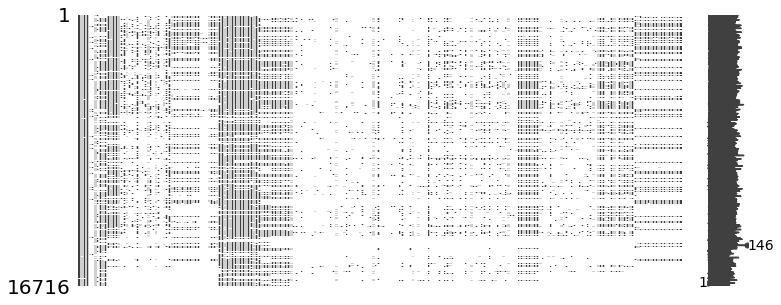

In [33]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
# 하지만 결측치를 처리 할 때 어떤데이터들을 모아서 결측치를 대체할 지 고민하는데 도움이 됨
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

# 설문통계

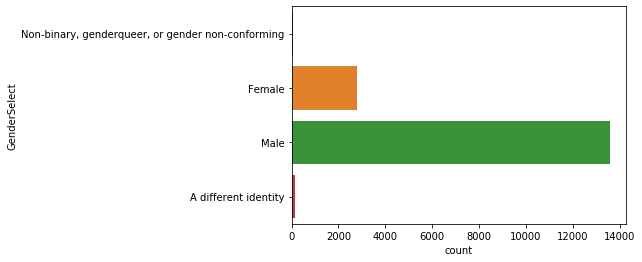

In [30]:
# 성별data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoIAAAEGCAYAAADxOfRGAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3deZhsVXnv8e9P5klQQEQQDyJC0KsgaECMAkHijBqMGHKdL2oSEI0avHi5qDeJEY2RaKIEUTFOgKKIUUBlEJR5OkdkUlARjCIRAZXxvX/s1VK2PdTp09XVh/39PE89tffae6/9rlVVXW+vPVSqCkmSJPXPA8YdgCRJksbDRFCSJKmnTAQlSZJ6ykRQkiSpp0wEJUmSemrVcQcgSRM22mijWrJkybjDkKSVxoUXXnhTVW081+1NBCUtGkuWLOGCCy4YdxiStNJI8oMV2d5Dw5IkST1lIihJktRTJoKSJEk9ZSIoSZLUUyaCkhaN717/83GHIEm9YiIoSZLUUyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTJoKSJEk9ZSIoSZLUUyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTJoKSJEk9ZSIoSZLUUyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTI0sEk1SS9w7MvynJYfNU98eS7DNF+U5JjpiPfSwmSXZLctK447i/SLIkybJxxzFKSbZNckmSi5NsNc913y8/Z5LUR6McEbwDeGGSjUa4j99RVRdU1YHzUVeSVeajnnFIsuoY9rnC/bVY+3yxxjWL5wNfrKodqup7s62czlB/D+bzcyZJGq9RJoJ3A0cCb5i8IMkjknw9yWXteYtW/rEkRyT5VpLvTzXqN2DPJN9MclWS57TtfztyluSwJEcnOb3V9dsvriRfSHJhku8k2X+g/LYk70hyLvC2JCcMLHt6ks/P1OAkT2xt+naSwydGnZKs0ubPb8tfMxDv6UmOT3JFkk8mSVv2jFZ2FvDCgX2s09p1fhvt2buVvzzJcUm+BJzSvtg/kOTyJF9O8p8T/ZnkuokEvY3unD5L3TPFf1qSTwFLZ+mbP251Lm37WGMglkNbO180aZutkpzT9vuOJLcNLHvzQDxvb2VLknw3yb+31/aUJGu1ZTsmuTTJt4G/GqhnTm1r75W/a3Wek2STVr5C7+0kmyQ5odV7aZInt/I3JlnWHgfN1N4kzwIOAl6d5LQhtv9X4CLg4a1d/5ju8/G1JE/KfZ+h5w30zTCfs//T3sOnJvl0kjfN9B6RJI1BVY3kAdwGPBC4DlgfeBNwWFv2JeBlbfqVwBfa9MeA4+gS1O2Aa6ap+2PAV9t6WwPXA2sCuwEntXUOA74FrAFsBPwcWK0te3B7XgtYBmzY5gv4szYd4Apg4zb/KeC5s7R5GfDkNv0uYFmb3h94W5teA7gA2LLFewuweWvLt4GntLb8qLUtwLED7fp74C/a9AbAVcA6wMtbP0y07YXAqcAqwMOAXwD7tGXXARu16Z2A02epe6b4bwe2nKVfJtrz6DZ/DHDQQCxvmWa7k4CXtOnXAre16b3o/slI67eTgKcCS+j+Adm+rXfsQHsuA57Wpg8f8rWZtm3tvfLcNv3ugTpW9L392YG+WYXus7MjXTK6DrAu8B1gh1naexjwpjY90/b3AjtPatcz2/QJwCnAasDjgUta+W7M8jmje19dQvcZWw+4eiKemR5rb7KkJEnDAy6oFcjXRnqxSFX9ku5Lf/JhpF3oEiuAT9AlPxO+UFX3VtXlwCYzVH9sW+9q4PvAtlOs8+WquqOqbgJ+OlDfgUkuBc4BHk6XcAHcA3yuxV4ttr9IskGL+SvTBdPWWa+qvtWKPjWweC/gpUkuAc4FNhzY53lVdX1V3Uv3xbmkteXaqrq6xfEfk+o6uNV1Ol2StUVbdmpV3dymnwp8uqruqaobgG9MF/sQdc8W/7Wz1LtNa89Vbf7jLb4Jn51mu13okif4/f7cC7iYbiRr24F4rq2qS9r0hcCSJOsDG1TVGa38E5Pqmkvb7qRLQH+7n4GYV+S9vQfwbwDttbul1XFCVd1eVbcBnwf+aLr2TlHnTNv/oKrOmdSur7bppcAZVXVXm56qbpj6c/YUukPTv66qW+kS5Ckl2T/JBUkuuPtXt063miRpBBbiXLJ/pvuy/ugM69TA9B0D0xOHSf8OeDZAVW0/xTZTzU+u6x5g1SS7AXsCu1TVr9ph0TXbOr+pqnsGtvko3RfYb4DjquruGdqQWZYdUFUn/05hF8vvxThDeybq+tOqunJSXX9IN4I1aLo67ua+0wLWHCifru6Z4p+8z+linskwdUyu7x+q6sOT4lnC7/fnWm39mfpzLm27qyXpE/uZ7rM0l/f2VDFOZ6r2Ls/2k9s42K57J+qvqnsz/bmnU72HZ3vNf6uqjqQb4WWdh2453eskSRqBkd8+po1QHQu8aqD4W8C+bXo/4KxZ6jikqraf9EX5oiQPSHdF5COBK6fZfLL1gf9uSeC2wM4z7PcG4AbgbXSH9gBIckySJ01a97+BW5NM1LfvwOKTgdclWa1t/+gk68wQ4xXAlrnvas+XTKrrgJackWSHaeo4E9i3nQO3KbD7wLLr6A4XAvzpEHUPHX87L26zKdqzJMmj2vz/BM5gducMxDe5P1+ZZN22z82SPGS6SqrqF8AtSSZG5/abVNfyvDazWdH39teB17VYVknyQLrX8vlJ1m6xvQD45nLEtKLbz8VZwHOTrNlep2ePeH+SpDlYqPsIvpfu/KEJBwKvSHIZXVLw+jnUeSVdMvEV4LVV9Zsht/sq3cjgZcA76ZKNmXwS+FE7nDfhccCNU6z7KuDIdBckhO78P4CjgMuBi9JdQPJhZhiNbW3ZH/hyuosofjCw+J1052Bd1up65zTVnEB3XtZSukONg4nX24H3J/km3QjObHUPFX+6q04fBdw8WN7a8wrguCRL6UaaPjRd+wccBLwxyXnAprT+rKpT6A6/frvVdzzdeWgzeQXwwfba/HqgfLlemyGs6Hv79cDurV0XAo+pqovo/hE5j+7w9VFVdfGwFa7o9nNRVecDJwKX0h2KvoD7Pg+SpEUi9x0F0lSSfAC4uKo+0uYfCHykql40xbrrtnOwSHIwsGlVzSXJnXdJPkZ3gv/xI9zHY4FXVtUb56m+tYFfV1Ul2ZfuwpG956Nujd7E56G9jmcC+7ekdFrrPHTLuv0ns51yKkmakOTCqtpprtsv+P3mViZJLqQ7h+pvJsraBTC/lwQ2z07yVrp+/QHdlby9UVXLgHlJApsdgQ+0Q9W/oLsKVyuPI5NsR3ce6sdnSwIlSQvPEUFJi4YjgpK0fFZ0RNDfGpYkSeopE0FJkqSeMhGUJEnqKRNBSZKknjIRlCRJ6ikTQUmSpJ4yEZQkSeopE0FJkqSeMhGUJEnqKRNBSZKknjIRlCRJ6ikTQUmSpJ4yEZQkSeopE0FJkqSeMhGUtGj8weYbjjsESeoVE0FJkqSeMhGUJEnqKRNBSZKknjIRlCRJ6ikTQUmSpJ4yEZQkSeopE0FJkqSeMhGUJEnqKRNBSZKknjIRlCRJ6qlVxx2AJE2488bv8MN3/I9xhzFWWxy6dNwhSOoRRwQlSZJ6ykRQkiSpp0wEJUmSespEUJIkqadMBCVJknrKRFCSJKmnTAQlSZJ6ykRQkiSpp0wEJUmSespEUJIkqadMBCVJknrKRFCSJKmnTAQlSZJ6ykRQkiSpp0wEJUmSespEUJIkqadMBCVJknpqqEQwyYuGKZMkSdLKY9gRwbcOWSZpkUlyT5JLBh5LRrivlyf5wKjqlyTNr1VnWpjkmcCzgM2SHDGw6IHA3aMMTNK8+XVVbT/uICRJi89sI4I3ABcAvwEuHHicCPzJaEOTNCpJVklyeJLzk1yW5DWtfLckZyQ5NslVSd6VZL8k5yVZmmSrtt5zk5yb5OIkX0uyyRT72DjJ59o+zk+y60K3U5I0sxlHBKvqUuDSJCcAt1fVPdB9iQBrLEB8klbcWkkuadPXVtULgFcBt1TVE5OsAZyd5JS2zuOBPwBuBr4PHFVVT0ryeuAA4CDgLGDnqqokrwbeAvzNpP2+H3hfVZ2VZAvg5Fbv70iyP7A/wGbrrzZ/rZYkzWrGRHDAKcCewG1tfq1W9uRRBCVpXk11aHgv4HFJ9mnz6wNbA3cC51fVjQBJvkf3WQdYCuzepjcHPptkU2B14Nop9rsnsF2SifkHJlmvqm4dXKmqjgSOBHjcZmvV3JooSZqLYRPBNatqIgmkqm5LsvaIYpI0egEOqKqTf6cw2Q24Y6Do3oH5e7nvb8a/AP9UVSe2bQ6bYh8PAHapql/PX9iSpPk07FXDtyd5wsRMkh0B/7hLK6+TgdclWQ0gyaOTrLMc268P/LhNv2yadU4B/npiJokXrEjSIjPsiOBBwHFJbmjzmwIvHk1IkhbAUcAS4KJ0x25/Bjx/ObY/jO5vwo+Bc4Atp1jnQOCDSS6j+1tzJvDaFYhZkjTPUjXcKTlt5GAbukNKV1TVXaMMTFL/PG6zteqk1zxq3GGM1RaHLh13CJJWIkkurKqd5rr9sL8ssjbwt8Drq2opsCTJc+a6U0mSJI3fsOcIfpTuasJd2vz1wP8bSUSSJElaEMMmgltV1buBuwDaVYCZeRNJkiQtZsMmgncmWQsogPbrAnfMvIkkSZIWs2GvGv6/wFeBhyf5JLAr8PJRBSVJkqTRGyoRrKpTk1wE7Ex3SPj1VXXTSCOTJEnSSM2YCA7eRLq5sT1vkWSLqrpoNGFJkiRp1GYbEXzvDMsK2GMeY5EkSdICmjERrKrdZ1ouSZKkldfQN5RO8rYkR7b5rb2htCRJ0spteW8o/eQ27w2lJUmSVnLeUFqSJKmnvKG0JElST3lDaUmSpJ7yhtKSJEk9NeOh4SSPSLI+QFX9HPgV8HTgpUlWX4D4JEmSNCKzjQgeC7wAuCXJ9sBxwD8Ajwf+FXj1aMOT1Cerb/oYtjj0gnGHIUm9MVsiuFZV3dCm/wI4uqrem+QBwCWjDU2SJEmjNNtVw4O3iNkD+DpAVd07sogkSZK0IGYbEfxGkmOBnwAPAr4BkGRTuhtMS5IkaSU1WyJ4EPBi4KHAU6rqrlb+UOCQUQYmSZKk0Zrx0HBVFd0FIs+pqh8PlF9cVSePOjhJkiSNzqy/LFJV9wC/mriNjCRJku4fhv1lkd8AS5OcCtw+UVhVB44kKkmSJI3csIngl9tDkiRJ9xPD/sTcx5OsBWxRVVeOOCZJkiQtgFnPEQRI8ly6G0h/tc1vn+TEUQYmSZKk0Rr20PBhwJOA0wGq6pIkW44oJkk9dcVPr2DXf9l13GFI0oI5+4Czx7r/oUYEgbur6pZJZTXfwUiSJGnhDDsiuCzJnwOrJNkaOBD41ujCkiRJ0qgNOyJ4APAY4A7g08Av6X51RJIkSSupYa8a/hXdT8r5s3KSJEn3EzMmgkm+xAznAlbV8+Y9IkmSJC2I2UYE39OeXwg8FPiPNv8S4LoRxSRJkqQFMGMiWFVnACR5Z1U9dWDRl5KcOdLIJEmSNFLDXiyycZJHTsy0ewhuPJqQJEmStBCGvX3MG4DTk3y/zS8BXjOSiCRJkrQghr1q+Kvt/oHbtqIrquqO0YUlSZKkURt2RBBgR7qRwFWBxyehqo4ZSVSSJEkauaESwSSfALYCLgHuacUFmAhKkiStpIYdEdwJ2K6q/H1hSZKk+4lhrxpeRncfQUmSJN1PDDsiuBFweZLz6H5vGPCXRSRJklZmwyaCh40yCEmSJC28YW8fc0aSRwBbV9XXkqwNrDLa0CRJkjRKQ50jmOR/AccDH25FmwFfGFVQksYrSbW7BUzMr5rkZ0lOmmW73WZbR5K0eAx7schfAbsCvwSoqquBh4wqKEljdzvw2CRrtfmnAz8eYzySpBEYNhG8o6runJhJsirdfQQl3X99BXh2m34J8OmJBUmelORbSS5uz9tM3jjJOkmOTnJ+W2/vBYpbkjSkYRPBM5L8b2CtJE8HjgO+NLqwJC0CnwH2TbIm8Djg3IFlVwBPraodgEOBv59i+0OAb1TVE4HdgcOTrDN5pST7J7kgyQV33XbXvDdCkjS9Ya8aPhh4FbAU2B/4clUdNbKoJI1dVV2WZAndaOB/Tlq8PvDx9hvkBaw2RRV7Ac9L8qY2vyawBfDdSfs5EjgSYN0t1vVIgyQtoBkTwXYoZ/Oq+iDw7+2ikY2BHZP8oqqOX4ggJY3NicB7gN2ADQfK3wmcVlUvaMni6VNsG+BPq+rK0YYoSZqr2Q4Nv4Xui2DC6sCOdF8KrxtRTJIWj6OBd1TV0knl63PfxSMvn2bbk4EDkgQgyQ4jiVCSNGezJYKrV9WPBubPqqqbq+qHwO+d6yPp/qWqrq+q90+x6N3APyQ5m+nvKfpOukPGlyVZ1uYlSYtIqqY/JSfJNVX1qGmWfa+qthpZZJJ6Z90t1q3Hv/nx4w5DkhbM2QecvULbJ7mwqnaa6/azjQie284LnLzT1wDnzXWnkiRJGr/Zrhp+A/CFJH8OXNTKdgTWAJ4/ysAkSZI0WjMmglX1U+DJSfYAHtOKv1xV3xh5ZJIkSRqpoe4j2BI/kz9JkqT7kWF/WUSSJEn3MyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTJoKSJEk9ZSIoSZLUUyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTJoKSJEk9teq4A5CkCds+ZFvOPuDscYchSb3hiKAkSVJPmQhKkiT1lImgJElST5kISpIk9ZSJoCRJUk+ZCEqSJPWUiaAkSVJPmQhKkiT1lImgJElST5kISpIk9ZSJoKRF49Yrr+SMpz6NM576tHGHIkm9YCIoSZLUUyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTJoKSJEk9ZSIoSZLUUyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTJoKSJEk9ZSIoSZLUUyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTJoLqtSQvSFJJth1y/cOSvKlNvyPJnm36j5J8J8klSdZKcnibP3zE8R+UZO1plh2VZLspyl+e5ANz3N8GSf5yYP5hSY5v09snedZc6pUkjYeJoPruJcBZwL7Lu2FVHVpVX2uz+wHvqartq+rXwGuAJ1TVm4epK8mqy7v/5iBgykSwql5dVZfPsd7pbAD8NhGsqhuqap82uz1gIihJKxETQfVWknWBXYFXMUMimOSQJFcm+RqwzUD5x5Lsk+TVwJ8Bhyb5ZJITgXWAc5O8OMnGST6X5Pz22LVtf1iSI5OcAhyTZJU2knh+ksuSvKatt1uS05Mcn+SKto8kORB4GHBaktOmiPv0JDu16VckuSrJGa3NE+vMFNvRrY7vt30BvAvYqo18Hp5kSZJlSVYH3gG8uC17cZKrk2zc6ntAkmuSbDSX10qSNBpzHYWQ7g+eD3y1qq5KcnOSJ1TVRYMrJNmRLkncge7zchFw4eA6VXVUkqcAJ1XVxGHS26pq+zb9KeB9VXVWki2Ak4E/aJvvCDylqn6dZH/glqp6YpI1gLNbkkjb/2OAG4CzgV2r6ogkbwR2r6qbpmtkkk2Bt7d93QKcBlzcFr9/hti2BXYH1gOuTPJvwMHAYwfatqT1wZ1JDgV2qqq/bsu2pRsp/WdgT+DSmeKUJC08E0H12UvokhSAz7T5iyat80fACVX1K4A22re89gS2SzIx/8Ak67XpE9uhZIC9gMclmTjUuj6wNXAncF5VXd9iuARYQndIexh/CJxeVT9r238WePQQsX25qu4A7kjyU2CTIfc34Wjgi3R9/Ergo1Ot1BLg/QE2WWON5dyFJGlFmAiql5JsCOwBPDZJAasAleQtVVWTVp88v7weAOwykPBNxABw+2ARcEBVnTxpvd2AOwaK7mH5P7vTtWGm2FZon1X1oyT/lWQPumR0v2nWOxI4EmCb9dZb0b6WJC0HzxFUX+0DHFNVj6iqJVX1cOBa4CmT1jsTeEG7Eng94Llz2NcpwF9PzCTZfpr1TgZel2S1tt6jk6wzS9230h26ncm5wG5JNmx1v2gOsQ2zv6mWHQX8B3BsVd0zS92SpAVmIqi+eglwwqSyzwF/PljQzhn8LHBJW/7NOezrQGCndgHI5cBrp1nvKOBy4KIky4APM/so3JHAV6a6WGRCVd0IHAZ8G/gav3v4e9jYJur6Od25i8umuDXOaXSHmS9J8uJWdiKwLtMcFpYkjVd+/yiYJM2PdtXy+6rqj4ZZf5v11qsjd3gCAE8784xRhiZJ9wtJLqyqnea6vecIShqJJAcDr2OacwMlSePnoWFJI1FV72rnYA57dbMkaYGZCEqSJPWUiaAkSVJPmQhKkiT1lImgJElST5kISpIk9ZSJoCRJUk+ZCEqSJPWUiaAkSVJPmQhKkiT1lImgJElST5kISpIk9ZSJoCRJUk+ZCEqSJPWUiaAkSVJPrTruACRpwnrbbMPTzjxj3GFIUm84IihJktRTJoKSJEk9ZSIoSZLUUyaCkiRJPWUiKEmS1FOpqnHHIEkAJLkVuHLccczBRsBN4w5ijox9PIx9PO6PsT+iqjaea6XePkbSYnJlVe007iCWV5ILVsa4wdjHxdjHw9h/n4eGJUmSespEUJIkqadMBCUtJkeOO4A5WlnjBmMfF2MfD2OfxItFJEmSesoRQUmSpJ4yEZQkSeopE0FJY5fkGUmuTHJNkoPHHQ9AkocnOS3Jd5N8J8nrW/mDk5ya5Or2/KBWniRHtDZcluQJA3W9rK1/dZKXLVD8qyS5OMlJbX7LJOe2GD6bZPVWvkabv6YtXzJQx1tb+ZVJ/mSB4t4gyfFJrmh9v8tK1OdvaO+VZUk+nWTNxdrvSY5O8tMkywbK5q2fk+yYZGnb5ogkGXHsh7f3zGVJTkiywcCyKftzur87071mo4p9YNmbklSSjdr8wvR7Vfnw4cPH2B7AKsD3gEcCqwOXAtstgrg2BZ7QptcDrgK2A94NHNzKDwb+sU0/C/gKEGBn4NxW/mDg++35QW36QQsQ/xuBTwEntfljgX3b9IeA17XpvwQ+1Kb3BT7bprdrr8UawJbtNVplAeL+OPDqNr06sMHK0OfAZsC1wFoD/f3yxdrvwFOBJwDLBsrmrZ+B84Bd2jZfAZ454tj3AlZt0/84EPuU/ckMf3eme81GFXsrfzhwMvADYKOF7HdHBCWN25OAa6rq+1V1J/AZYO8xx0RV3VhVF7XpW4Hv0n3Z702XrNCen9+m9waOqc45wAZJNgX+BDi1qm6uqv8GTgWeMcrYk2wOPBs4qs0H2AM4fpq4J9pzPPDHbf29gc9U1R1VdS1wDd1rNcq4H0j3RfkRgKq6s6p+wUrQ582qwFpJVgXWBm5kkfZ7VZ0J3DypeF76uS17YFV9u7rs5JiBukYSe1WdUlV3t9lzgM0HYp+qP6f8uzPLZ2UksTfvA94CDF7BuyD9biIoadw2A340MH99K1s02mG7HYBzgU2q6kbokkXgIW216doxjvb9M92Xyr1tfkPgFwNflIMx/Da+tvyWtv444n4k8DPgo+kOax+VZB1Wgj6vqh8D7wF+SJcA3gJcyMrR7xPmq583a9OTyxfKK+lGw2D5Y5/pszISSZ4H/LiqLp20aEH63URQ0rhNdQ7LormvVZJ1gc8BB1XVL2dadYqymqF8JJI8B/hpVV04WDxDDIsi7mZVusNm/1ZVOwC30x2inM6iib2dT7c33eHHhwHrAM+cIY5FE/sQljfWsbUhySHA3cAnJ4qmiWVRxJ5kbeAQ4NCpFk8Ty7zGbiIoadyupzs/ZsLmwA1jiuV3JFmNLgn8ZFV9vhX/VzsEQ3v+aSufrh0L3b5dgecluY7ucNcedCOEG7RDlpNj+G18bfn6dIeuxvG6XA9cX1Xntvnj6RLDxd7nAHsC11bVz6rqLuDzwJNZOfp9wnz18/Xcd2h2sHyk2kUTzwH2a4dGmSXGqcpvYvrXbBS2ovvn4dL2md0cuCjJQ+cQ+5z63URQ0ridD2zdrtRbne7E+RPHHNPEeXUfAb5bVf80sOhEYOIqvZcBXxwof2m70m9n4JZ2eO1kYK8kD2qjRnu1spGoqrdW1eZVtYSuL79RVfsBpwH7TBP3RHv2aetXK9833dWtWwJb052IPjJV9RPgR0m2aUV/DFzOIu/z5ofAzknWbu+didgXfb8PmJd+bstuTbJz64uXDtQ1EkmeAfwt8Lyq+tWkNk3Vn1P+3WmvwXSv2byrqqVV9ZCqWtI+s9fTXaT2Exaq3+dy1YsPHz58zOeD7uq4q+iu4jtk3PG0mJ5Cd1jlMuCS9ngW3TlEXweubs8PbusH+GBrw1Jgp4G6Xkl3kvo1wCsWsA27cd9Vw4+k+wK8BjgOWKOVr9nmr2nLHzmw/SGtPVcyj1d9zhLz9sAFrd+/QHdV5ErR58DbgSuAZcAn6K5UXZT9Dnya7lzGu+iSj1fNZz8DO7V++B7wAdovmY0w9mvozpub+Kx+aLb+ZJq/O9O9ZqOKfdLy67jvquEF6Xd/Yk6SJKmnPDQsSZLUUyaCkiRJPWUiKEmS1FMmgpIkST1lIihJktRTJoKSJM2TJAe1X4uQVgrePkaSpHnSfh1ip6q6adyxSMNwRFCS1CtJXprksiSXJvlEkkck+Xor+3qSLdp6H0uyz8B2t7Xn3ZKcnuT4JFck+WT79YcD6X5n+LQkp42nddLyWXX2VSRJun9I8hi6X5rYtapuSvJg4OPAMVX18SSvBI4Anj9LVTsAj6H7LdezW31HJHkjsLsjglpZOCIoSeqTPYDjJxK1qroZ2AX4VFv+CbqfF5zNeVV1fVXdS/eTZktGEKs0ciaCkqQ+Cd1vSM9kYvndtO/JJAFWH1jnjoHpe/AIm1ZSJoKSpD75OvBnSTYEaIeGvwXs25bvB5zVpq8DdmzTewOrDVH/rcB68xWsNGr+ByNJ6o2q+k6SvwPOSHIPcDFwIHB0kjcDPwNe0Vb/d+CLSc6jSyBvH2IXRwJfSXJjVe0+/y2Q5pe3j5EkSeopDw1LkiT1lImgJElST5kISpIk9ZSJoCRJUk+ZCEqSJPWUiaAkSVJPmQhKkiT11P8HyEnUahUAAAADSURBVJuJK05xw/EAAAAASUVORK5CYII=
sns.countplot(y='GenderSelect', data=mcq)

In [25]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())

# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
# 우리 나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

응답 수                           국가
0   4197                United States
1   2704                        India
2   1023                        Other
3    578                       Russia
4    535               United Kingdom
5    471  People 's Republic of China
6    465                       Brazil
7    460                      Germany
8    442                       France
9    440                       Canada
10   421                    Australia
11   320                        Spain
12   277                        Japan
13   254                       Taiwan
14   238                        Italy
15   205                  Netherlands
16   196                      Ukraine
17   194                  South Korea
18   184                       Poland
19   184                    Singapore

In [26]:
# 연령에 대한 정보
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

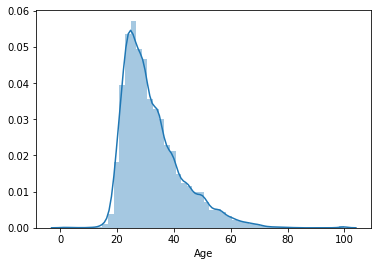

In [11]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])
#응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세다.

# 학력

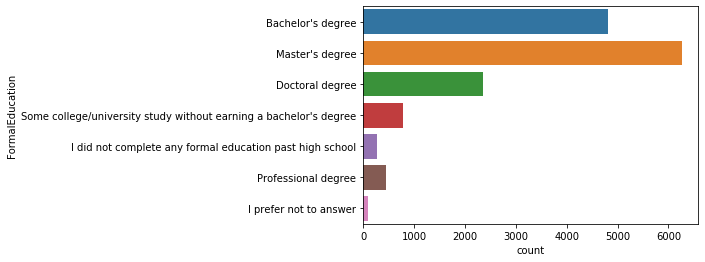

In [27]:
sns.countplot(y='FormalEducation', data=mcq)

In [28]:
pd.DataFrame(mcq['MajorSelect'].value_counts())

MajorSelect
Computer Science                                           4397
Mathematics or statistics                                  2220
Engineering (non-computer focused)                         1339
Electrical Engineering                                     1303
Other                                                       848
Physics                                                     830
Information technology, networking, or system a...          693
A social science                                            531
Biology                                                     274
Management information systems                              237
A humanities discipline                                     198
A health science                                            152
Psychology                                                  137
I never declared a major                                     65
Fine arts or performing arts                                 57

# 전공

In [15]:
# value_counts 를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다. 
# normalize=True 옵션을 사용하면, 
# 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True)) #이건 몰랐어
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

응답 수        비율
Computer Science                                    4397  0.331074
Mathematics or statistics                           2220  0.167156
Engineering (non-computer focused)                  1339  0.100821
Electrical Engineering                              1303  0.098110
Other                                                848  0.063851
Physics                                              830  0.062495
Information technology, networking, or system a...   693  0.052180
A social science                                     531  0.039982
Biology                                              274  0.020631
Management information systems                       237  0.017845
A humanities discipline                              198  0.014909
A health science                                     152  0.011445
Psychology                                           137  0.010315
I never declared a major                              65  0.004894
Fine arts or performing arts                          57  0.004292

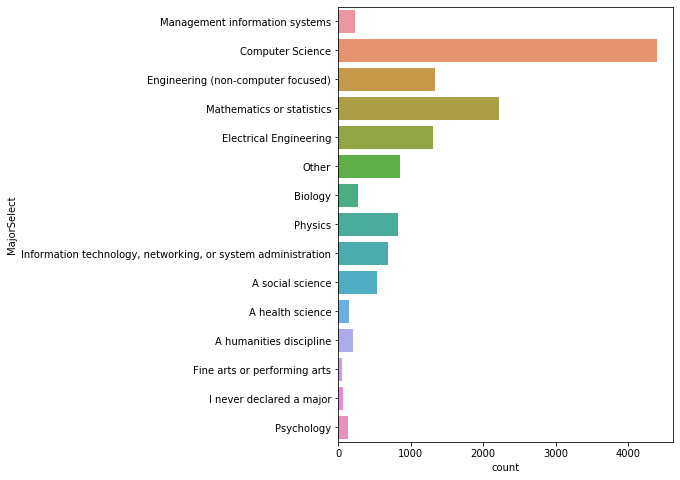

In [32]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

# 취업 여부

In [19]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

응답 수        비율
Employed full-time                                  10897  0.651890
Not employed, but looking for work                   2110  0.126226
Independent contractor, freelancer, or self-emp...   1330  0.079564
Not employed, and not looking for work                924  0.055276
Employed part-time                                    917  0.054858
I prefer not to say                                   420  0.025126
Retired                                               118  0.007059

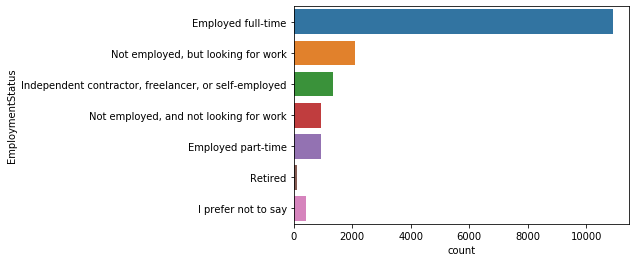

In [21]:
sns.countplot(y='EmploymentStatus', data=mcq)
# 응답자의 대부분이 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%다.

# 프로그래밍 경험
'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

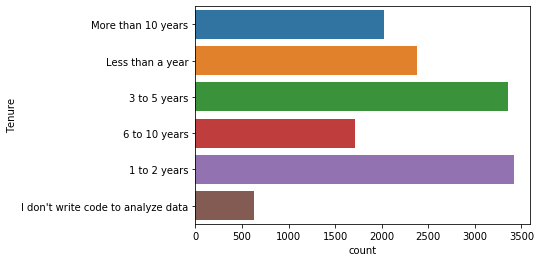

In [22]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 194


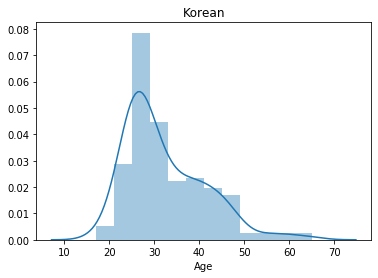

In [34]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [35]:
pd.DataFrame(korea['GenderSelect'].value_counts())

GenderSelect
Male                           156
Female                          37
A different identity             1

Text(0.5, 1.0, 'Korean')

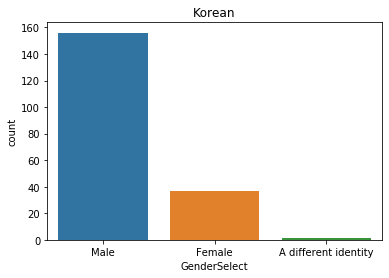

In [36]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

IndexError: list index out of range

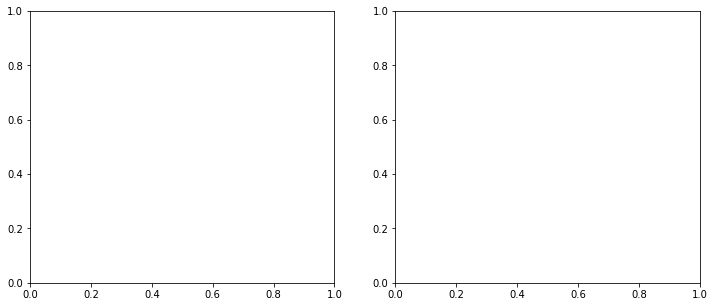

In [42]:
# matplotlib에서 subplot을 사용하면 여러개 table을 그릴 수 있으
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[100], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean  Male')

Text(0.5, 1.0, 'korean  Male')

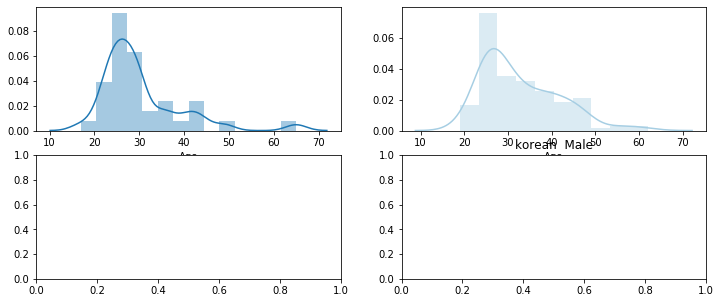

In [54]:
figure, axs = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[1], ax=axs[0,0])
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=axs[0,1])
plt.title('korean  Male')

In [50]:
ax1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e40adc450>,
      dtype=object)

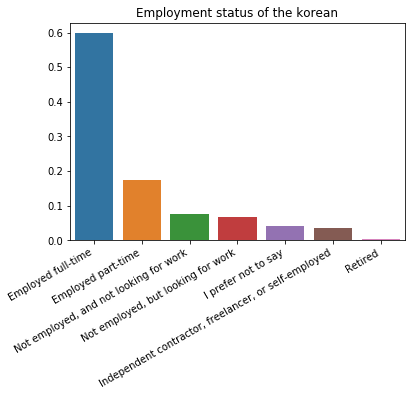

In [62]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right') #matplotlib에서 sticks를 사용하면 x를 기울여서 적을 수 있음 -
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

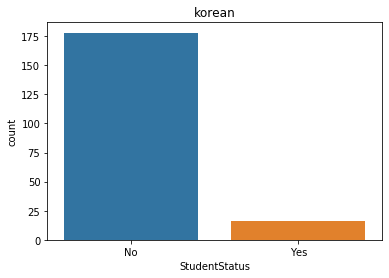

In [28]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()